# Project: Wrangling and Analyzing Data

## Data Gathering

### I will be uploading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) already downloaded

In [1]:
import pandas as pd
twitterarchivedata = pd.read_csv('/Users/USER/Downloads/twitter-archive-enhanced.csv')
twitterarchivedata.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Using the  Requests library to download the tweet image prediction (image_predictions.tsv)

### installing requests library

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### Importing requests library and downloading tweet image prediction

In [3]:
import requests
dataurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request_data = requests.get(dataurl)
request_content = request_data.content

#save file
with open('mydata.csv', 'wb') as outfile:
    outfile.write(request_content)
    
#load file using pandas
imagepredictions = pd.read_csv('mydata.csv', delimiter = '\t')
tweet_ids = imagepredictions.tweet_id.values
len(tweet_ids)
imagepredictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

## Installing tweepy library

In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing tweepy and json

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### The API keys have been saved in a config file for security. I will be importing the config file

In [6]:
import config

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
### These are hidden to comply with Twitter's API terms and conditions

In [7]:
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_secret = config.access_secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive

In [9]:
count = 0
fails_dict = {}
start = timer()

#### Saving each tweet's returned JSON as a new line in a .txt file

In [10]:
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Rate limit reached. Sleeping for: 249


1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

Rate limit reached. Sleeping for: 788


Success
456: 674767892831932416
Success
457: 674774481756377088
Success
458: 674781762103414784
Success
459: 674788554665512960
Success
460: 674790488185167872
Success
461: 674793399141146624
Success
462: 674800520222154752
Success
463: 674805413498527744
Success
464: 674999807681908736
Success
465: 675003128568291329
Success
466: 675006312288268288
Success
467: 675015141583413248
Success
468: 675047298674663426
Success
469: 675109292475830276
Success
470: 675111688094527488
Success
471: 675113801096802304
Success
472: 675135153782571009
Success
473: 675145476954566656
Success
474: 675146535592706048
Success
475: 675147105808306176
Success
476: 675149409102012420
Success
477: 675153376133427200
Success
478: 675166823650848770
Success
479: 675334060156301312
Success
480: 675349384339542016
Success
481: 675354435921575936
Success
482: 675362609739206656
Success
483: 675372240448454658
Success
484: 675432746517426176
Success
485: 675483430902214656
Success
486: 675489971617296384
Success


Rate limit reached. Sleeping for: 791


Success
911: 700747788515020802
Success
912: 700796979434098688
Success
913: 700847567345688576
Success
914: 700864154249383937
Success
915: 700890391244103680
Success
916: 701214700881756160
Success
917: 701545186879471618
Success
918: 701570477911896070
Success
919: 701601587219795968
Success
920: 701889187134500865
Success
921: 701952816642965504
Success
922: 701981390485725185
Success
923: 702217446468493312
Success
924: 702276748847800320
Success
925: 702321140488925184
Success
926: 702539513671897089
Success
927: 702598099714314240
Success
928: 702671118226825216
Success
929: 702684942141153280
Success
930: 702932127499816960
Success
931: 703041949650034688
Success
932: 703079050210877440
Success
933: 703268521220972544
Success
934: 703356393781329922
Success
935: 703382836347330562
Success
936: 703407252292673536
Success
937: 703425003149250560
Success
938: 703611486317502464
Success
939: 703631701117943808
Success
940: 703769065844768768
Success
941: 703774238772166656
Success


Rate limit reached. Sleeping for: 682


Success
1526: 788412144018661376
Success
1527: 788765914992902144
Success
1528: 788908386943430656
Success
1529: 789137962068021249
Success
1530: 789268448748703744
Success
1531: 789530877013393408
Success
1532: 789599242079838210
Success
1533: 789628658055020548
Success
1534: 789986466051088384
Success
1535: 790277117346975746
Success
1536: 790337589677002753
Success
1537: 790581949425475584
Success
1538: 790698755171364864
Success
1539: 790723298204217344
Success
1540: 790946055508652032
Success
1541: 790987426131050500
Success
1542: 791026214425268224
Success
1543: 791312159183634433
Success
1544: 791406955684368384
Success
1545: 791672322847637504
Success
1546: 792050063153438720
Success
1547: 792394556390137856
Success
1548: 792773781206999040
Success
1549: 792883833364439040
Success
1550: 792913359805018113
Success
1551: 793120401413079041
Success
1552: 793135492858580992
Success
1553: 793150605191548928
Success
1554: 793165685325201412
Success
1555: 793180763617361921
Success
15

In [11]:
tweetdata = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [12]:
tweetdata.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
0,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,423,2293,False,False,False,False,en,NaN
1,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,39,112,False,False,False,False,en,NaN
2,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,36,100,False,False,False,False,en,NaN
3,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,115,247,False,False,False,False,en,NaN
4,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,37,89,False,False,False,False,en,NaN


# Assessing Data

## Visual and Programmatic Assessment

### I used excel to view the twitter_archive_enhanced.csv dataset and also assessed all three datasets programmatically. 

## 1. Assessing twitter_archive_enhanced.csv dataset

Randomly viewing 10 tweets

In [13]:
twitterarchivedata.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
1353,703769065844768768,NaN,NaN,2016-02-28 02:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703769065...,10,10,None,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
1473,693647888581312512,NaN,NaN,2016-01-31 04:11:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None


In [14]:
twitterarchivedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# 2. Assessing image-predictions.tsv dataset

Randomly view 10 samples

In [15]:
imagepredictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1886,847962785489326080,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,0.882654,False,mink,0.066880,False,otter,0.025679,False
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1554,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,Lakeland_terrier,0.266824,True,Irish_terrier,0.218783,True,Airedale,0.132960,True


In [16]:
imagepredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# 3. Assessing additional information in json file

Randomly view 10 samples

In [17]:
tweetdata.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
1807,2017-02-20 23:50:09+00:00,833826103416520705,833826103416520704,Meet Charlie. She asked u to change the channe...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 833826091328430080, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,3493,17097,False,False,False,False,en,NaN
295,2015-11-30 15:59:17+00:00,671357843010908160,671357843010908160,Tfw she says hello from the other side. 9/10 h...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671357838413996033, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,133,351,False,False,False,False,en,NaN
104,2015-11-20 22:30:44+00:00,667832474953625600,667832474953625600,THE EYES 12/10\n\nI'm sorry. These are suppose...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667832472072282112, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,55,255,False,False,False,False,en,NaN
854,2016-02-08 15:14:57+00:00,696713835009417216,696713835009417216,This is Trevith. He's a Swiss Mountain Roadwoo...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696713823303135232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,588,2183,False,False,False,False,en,NaN
100,2015-11-20 19:12:01+00:00,667782464991965184,667782464991965184,Super rare dog. Endangered (?). Thinks it's fu...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667782457777754112, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,211,363,False,False,False,False,en,NaN
1493,2016-10-06 00:08:09+00:00,783821107061198850,783821107061198848,This is Mairi. She has mastered the art of cam...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783821100060905476, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,1829,6991,False,False,False,False,en,NaN
1452,2016-09-19 01:42:24+00:00,777684233540206592,777684233540206592,"""Yep... just as I suspected. You're not flossi...",False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 777684227185868800, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,2727,10621,False,False,False,False,en,NaN
14,2015-11-16 03:22:39+00:00,666094000022159362,666094000022159360,This appears to be a Mongolian Presbyterian mi...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666093996847063040, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,63,143,False,False,False,False,en,NaN
658,2015-12-31 02:52:40+00:00,682393905736888321,682393905736888320,This is Kreg. He's riding an invisible jet ski...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682393897700474880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,598,2077,False,False,False,False,en,NaN
1526,2016-10-22 00:45:17+00:00,789628658055020548,789628658055020544,This is Eli. He can fly. 13/10 magical af http...,False,"[0, 41]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 789628648391401472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,1651,7084,False,False,False,False,en,NaN


In [18]:
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2057 non-null   datetime64[ns, UTC]
 1   id                             2057 non-null   int64              
 2   id_str                         2057 non-null   int64              
 3   full_text                      2057 non-null   object             
 4   truncated                      2057 non-null   bool               
 5   display_text_range             2057 non-null   object             
 6   entities                       2057 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2057 non-null   object             
 9   in_reply_to_status_id          23 non-null     float64            
 10  in_reply_to_status_id_st

# Quality Issues

#### 1. Non-null values in the retweeted_status_user_id column. We are required to use original tweets, so retweets will be excluded from our dataset.

#### 2. Missing values in the "expanded_urls" columns of the twitter_archive_enhanced.csv dataset

#### 3. Wrong data types for columns like tweet_id, timestamp.

#### 4.  Wrong column header names in the  json file - created_at, id.

#### 5. Erroneous capture of no values as "None" in "name" column of twitter_archive_enhanced.csv dataset.

#### 6. Duplicate values present in the  "jpg_url" column of image-predictions.tsv dataset.

#### 7.  Presence of outliers in rating_numerators column.

####  8. Timestamp column has date and time merged together.

# Tidiness Issues

#### 1. Text column in  twitter_archive_enhanced.csv dataset has both text, urls and &amp.

#### 2. Source column in twitter_archive_enhanced.csv and json file datasets has hashtags instead of source name

#### 3. Four different dog stages are assigned to a single tweet_id in four different columns - This needs to be merged.

# Data Cleaning

First step will be to make copies of each dataset.

In [19]:
twitterarchivedata_copy = twitterarchivedata.copy()
imagepredictions_copy = imagepredictions.copy()
tweetdata_copy = tweetdata.copy()

## Issue 1: Non-null values in the retweeted_status_user_id column.

### Define: This shows the presence of retweets. We are required to use original tweets for data analysis. Therefore, I will be removing tweet_ids for retweet from the twitterarchivedata_copy dataset. This means all rows that have non-null values in the retweeted_status_id, retweeted_status_user_id columns and in_reply_to_status_id.

### Code

In [20]:
twitterarchivedata_copy = twitterarchivedata_copy[pd.isnull(twitterarchivedata_copy['retweeted_status_user_id'])]
twitterarchivedata_copy = twitterarchivedata_copy[pd.isnull(twitterarchivedata_copy['in_reply_to_status_id'])]

### Test

In [21]:
twitterarchivedata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

## Issue 2: Missing values in the "expanded_urls" columns of the twitter_archive_enhanced.csv dataset.

### Define: I observed from excel view that some of the rows did not have expanded urls (no images). So the next step is to remove those rows without expanded urls. This will leave us with dataframe of original tweets with images.

### Code

In [22]:
twitterarchivedata_copy = twitterarchivedata_copy[twitterarchivedata_copy['expanded_urls'].notnull()]

### Test

In [23]:
twitterarchivedata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

From the above, we can see that the count dropped from 2097 to 2094

## Other improvement: Drop unwanted columns from the twitterarchivedata_copy and tweetdata_copy dataframes. 

### Define: These columns include:
  ###  twitterarchivedata_copy: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" 
  
  ### tweetdata_copy: 'id_str', 'full_text', 'truncated', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'display_text_range', 'entities', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'extended_entities', 'is_quote_status', 'user', 'geo', 'coordinates', 'place', 'contributors', 'in_reply_to_status_id', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status'

### Code

In [25]:
twitterarchivedata_copy.drop(['in_reply_to_status_id', 
                           'in_reply_to_user_id',
                           'retweeted_status_id', 
                           'retweeted_status_user_id', 
                           'retweeted_status_timestamp'], 
                          axis=1, inplace=True)

tweetdata_copy.drop(['id_str', 'full_text', 'truncated', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
                           'display_text_range', 'entities', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                           'extended_entities', 'is_quote_status', 'user', 'geo', 'coordinates', 'place', 'contributors',
                           'in_reply_to_status_id', 'favorited', 'retweeted', 'possibly_sensitive',
                           'possibly_sensitive_appealable', 'lang', 'retweeted_status'], 
                          axis=1, inplace=True)

### Test

In [26]:
#let's view column names
print(twitterarchivedata_copy.columns.values)
print(tweetdata_copy.columns.values)

['tweet_id' 'timestamp' 'source' 'text' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name' 'doggo' 'floofer' 'pupper' 'puppo']
['created_at' 'id' 'source' 'retweet_count' 'favorite_count']


From the above output we can see that the unwanted columns have been dropped.

## Issue 3: Wrong data types.

### Define: From the df.info(), I observed that the following columns have wrong data types: "tweet_id" and  "timestamp"

### Code

In [27]:
twitterarchivedata_copy['timestamp']= pd.to_datetime(twitterarchivedata_copy['timestamp']).dt.tz_localize(None)
tweetdata_copy['created_at']= pd.to_datetime(tweetdata_copy['created_at']).dt.tz_localize(None)
twitterarchivedata_copy['tweet_id']= twitterarchivedata_copy['tweet_id'].astype(str)
imagepredictions_copy['tweet_id']= imagepredictions_copy['tweet_id'].astype(str)
tweetdata_copy['id']= tweetdata_copy['id'].astype(str)

### Test

In [28]:
print(twitterarchivedata_copy['timestamp'].dtypes)
print(tweetdata_copy['created_at'].dtypes)
print(twitterarchivedata_copy['tweet_id'].dtypes)
print(imagepredictions_copy['tweet_id'].dtypes)
print(tweetdata_copy['id'].dtypes)

datetime64[ns]
datetime64[ns]
object
object
object


From the above output I can confirm that this has been changed.

## Issue 4: Wrong column header names

### Define: Renaming the column headers in the tweetdata_copy - created_at, id, retweet_count, favorite_count

### Code

In [29]:
dict = {'created_at': 'timestamp', 'id': 'tweet_id', 'retweet_count': 'number of retweets', 'favorite_count': 'number of likes'}
tweetdata_copy.rename(columns= dict, inplace=True)

### Test

In [30]:
tweetdata_copy.head(0)

,timestamp,tweet_id,source,number of retweets,number of likes


From the above output, the column names have been changed.

## Issue 5:  Erroneous capture of no values as "None" in "name" column of twitter_archive_enhanced.csv dataset.

### Define: From the excel visualization, I observed that the "name" column has some "None" as values for some tweets. They failed to show as "NaN" when I ran our programme. This needs to be changed to "NaN".

### Code

In [32]:
import numpy as np
twitterarchivedata_copy['name'].replace('None', np.nan, inplace = True)

### Test

In [33]:
twitterarchivedata_copy['name'].sample(10)

731       Combo
2123      Larry
1438      Rosie
1115    Aldrick
1328       Lucy
1701      Alice
2096        Gin
986     Winston
1491     Tupawc
172         NaN
Name: name, dtype: object

## Issue 6: Duplicate values present in the "jpg_url" column of image-predictions.tsv dataset.

### Define: The "jpg_url" column of image-predictions.tsv dataset has duplicate values and the corresponding tweet ids need to be excluded.

### Code

In [34]:
imagepredictions_copy.drop_duplicates(subset=['jpg_url'], keep='last', inplace= True)

### Test

In [35]:
#Checking the total number of duplicates
sum(imagepredictions_copy['jpg_url'].duplicated())

0

## Issue 7: Presence of outliers in rating_numerators column.

### Define: Although it was stated that the value of the numerator can exceed 10, I observed extremely high values in the rating_numerators column.

### Code

In [36]:
twitterarchivedata_copy.query('rating_numerator>= 200.0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,None,None,None,None


I will be confirming the images on these tweet ids

In [37]:
print(imagepredictions_copy.query('tweet_id == 749981277374128128')['jpg_url'])
print(imagepredictions_copy.query('tweet_id == 731156023742988288')['jpg_url'])
print(imagepredictions_copy.query('tweet_id == 670842764863651840')['jpg_url'])

Series([], Name: jpg_url, dtype: object)
Series([], Name: jpg_url, dtype: object)
Series([], Name: jpg_url, dtype: object)


From the output above, these tweet ids do not have images. They will be removed when the datasets are merged.

## Issue 8: Timestamp column has date and time merged together.

### Define: The 'timestamp' columns of twitterarchivedata_copy and tweetdata_copy needs to be separated into two different columns of date and time each. Then I will be dropping the timestamp column in both datasets.

### Code

In [38]:
twitterarchivedata_copy['date'] = twitterarchivedata_copy['timestamp'].apply(lambda date: date.strftime('%Y-%d-%m'))
twitterarchivedata_copy['time'] = twitterarchivedata_copy['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))
tweetdata_copy['date'] = tweetdata_copy['timestamp'].apply(lambda date: date.strftime('%Y-%d-%m'))
tweetdata_copy['time'] = tweetdata_copy['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))

### Test

In [39]:
print(twitterarchivedata_copy.columns.values)
print(tweetdata_copy.columns.values)

['tweet_id' 'timestamp' 'source' 'text' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name' 'doggo' 'floofer' 'pupper' 'puppo' 'date'
 'time']
['timestamp' 'tweet_id' 'source' 'number of retweets' 'number of likes'
 'date' 'time']


In [40]:
#Dropping "timestamp" column in both dataset
twitterarchivedata_copy.drop('timestamp', axis=1, inplace=True)
tweetdata_copy.drop('timestamp', axis=1, inplace=True)

In [41]:
#Checking new column headers.
print(twitterarchivedata_copy.columns.values)
print(tweetdata_copy.columns.values)

['tweet_id' 'source' 'text' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name' 'doggo' 'floofer' 'pupper' 'puppo' 'date'
 'time']
['tweet_id' 'source' 'number of retweets' 'number of likes' 'date' 'time']


# Tidiness Issues

## Issue 1: Text column in twitter_archive_enhanced.csv dataset has both text, urls and &amp.

### Define: The first tidiness to be carried out would be to separate text from urls in the text column of the twitterarchivedata_copy dataset and also replacing the "&amp" as observed in some dataset in excel visualization with "&"


### Code

In [42]:
#Replace the url with empty " " using Regex
import re
twitterarchivedata_copy['text'] = twitterarchivedata_copy.text.apply(lambda x : re.sub('http\S+','', x).strip())

#Replace &amp with "&"
twitterarchivedata_copy['text'] = twitterarchivedata_copy.text.str.replace("&amp;", "&")

### Test

In [43]:
#Display full text in "text" column
pd.set_option('display.max_colwidth', None)
twitterarchivedata_copy['text'].sample(5)

141     We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10
2225        Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10
2111                     Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of
2174        This is Clarq. He's a golden Quetzalcoatl. Clarq enjoys eating his own foot. Damn it Clarq. 8/10 would pet firmly
1344                                                     When you wake up from a long nap and have no idea who you are. 12/10
Name: text, dtype: object

## Issue 2:  Source column in twitter_archive_enhanced.csv and json file datasets has hashtags instead of source name

### Define: The source names are embedded in the hashtags. So I will be adopting the same operation as text column above to extract the various sources of tweet.

### Code

In [44]:
twitterarchivedata_copy.source = twitterarchivedata_copy.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])
tweetdata_copy.source = tweetdata_copy.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

### Test

In [45]:
print(twitterarchivedata_copy['source'].unique())
print(tweetdata_copy['source'].unique())

['Twitter for iPhone' 'Twitter Web Client' 'Vine ' 'TweetDeck']
['Twitter for iPhone' 'Twitter Web Client' 'TweetDeck']


## Issues 4: Four different dog stages are assigned to a single tweet_id in four different columns - This needs to be merged.

### Define: Since these represents various stages of dogs, these columns need to be collapsed into one and the original columns deleted.

In [46]:
twitterarchivedata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   object
 1   source              2094 non-null   object
 2   text                2094 non-null   object
 3   expanded_urls       2094 non-null   object
 4   rating_numerator    2094 non-null   int64 
 5   rating_denominator  2094 non-null   int64 
 6   name                1494 non-null   object
 7   doggo               2094 non-null   object
 8   floofer             2094 non-null   object
 9   pupper              2094 non-null   object
 10  puppo               2094 non-null   object
 11  date                2094 non-null   object
 12  time                2094 non-null   object
dtypes: int64(2), object(11)
memory usage: 229.0+ KB


### Code

In [47]:
# Code: Melting the 4 stages' columns into stages and dog_stages columns
twitterarchivedata_copy = pd.melt(twitterarchivedata_copy, id_vars=['tweet_id', 'source', 'date', 'time', 'text', 'expanded_urls',
                                                              'rating_numerator','rating_denominator', 'name'],
                         var_name='stages', value_name='dog_stages')

# Code: drop stages column
twitterarchivedata_copy = twitterarchivedata_copy.drop('stages', axis= 1)

# Code: sort by dog_stage and get rid of the duplicated based on tweet_id
twitterarchivedata_copy = twitterarchivedata_copy.sort_values('dog_stages').drop_duplicates(subset='tweet_id', keep='last')

### Test

In [48]:
twitterarchivedata_copy['dog_stages'].value_counts()

None       1759
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_stages, dtype: int64

In [49]:
twitterarchivedata_copy.head()

,tweet_id,source,date,time,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2017,667435689202614272,Twitter for iPhone,2015-19-11,20:14:03,Ermergerd 12/10,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,NaN,None
2016,667437278097252352,Twitter for iPhone,2015-19-11,20:20:22,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,NaN,None
2015,667443425659232256,Twitter for iPhone,2015-19-11,20:44:47,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,NaN,None
2014,667453023279554560,Twitter Web Client,2015-19-11,21:22:56,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None
2013,667455448082227200,Twitter Web Client,2015-19-11,21:32:34,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7,10,Reese,None


## Other Data Cleaning Processes

## Issue - Creating new columns for dog breed predictions and prediction confidence.

### Define: 

Because I will be using the breed prediction and prediction confidence in my analysis, I will be creating a single column for the predictions of the dog breeds (p1_dog, p2_dog and p3_dog) and then assigning their values to this new column. Simultaneously, I will be doing the same thing for the confidence levels assigned since these were written in descending order, i.e., p1_conf > p2_conf > p3_conf.

Finally I will be dropping the following columns: 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

### Code

In [50]:
def predictedbreed(pb):
    if pb['p1_dog']:
        return(pb['p1'])
    elif pb['p2_dog']:
        return(pb['p2'])
    elif pb['p3_dog']:
        return(pb['p3'])
    else:
        return(np.NaN)
imagepredictions_copy['predicted dog breed'] = imagepredictions_copy.apply (lambda pb: predictedbreed (pb),axis=1)
    
def confidencelevel(cl):
    if cl['p1_dog']:
        return(cl['p1_conf'])
    elif cl['p2_dog']:
        return(cl['p2_conf'])
    elif cl['p3_dog']:
        return(cl['p3_conf'])
    else:
        return(np.NaN)
imagepredictions_copy['degree of confidence'] = imagepredictions_copy.apply (lambda cl: confidencelevel (cl), axis= 1)

# Drop unwanted columns
imagepredictions_copy.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
                    axis =1, inplace = True)

### Test

In [51]:
imagepredictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2009 non-null   object 
 1   jpg_url               2009 non-null   object 
 2   img_num               2009 non-null   int64  
 3   predicted dog breed   1691 non-null   object 
 4   degree of confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


## Issue: Drop the img_num column from the imagepredictions_copy dataset

### Define

The img_num column is not required for my data analysis. Hence, I will be dropping the column.

### Code

In [52]:
imagepredictions_copy.drop('img_num', axis =1, inplace = True)

### Test

In [53]:
imagepredictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2009 non-null   object 
 1   jpg_url               2009 non-null   object 
 2   predicted dog breed   1691 non-null   object 
 3   degree of confidence  1691 non-null   float64
dtypes: float64(1), object(3)
memory usage: 78.5+ KB


## Issue - Drop other unwanted columns in the remaining two datasets

### Define: I will be dropping some columns in the twitterarchivedata_copy and tweetdata_copy datasets. First let's have a look at the columns.

### Code

In [54]:
print(twitterarchivedata_copy.info())
print(tweetdata_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   object
 1   source              2094 non-null   object
 2   date                2094 non-null   object
 3   time                2094 non-null   object
 4   text                2094 non-null   object
 5   expanded_urls       2094 non-null   object
 6   rating_numerator    2094 non-null   int64 
 7   rating_denominator  2094 non-null   int64 
 8   name                1494 non-null   object
 9   dog_stages          2094 non-null   object
dtypes: int64(2), object(8)
memory usage: 180.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2057 non-null   object
 1   so

In [55]:
# Dropping unwanted columns
twitterarchivedata_copy.drop(['text', 'expanded_urls'], axis =1, inplace = True)
tweetdata_copy.drop(['date', 'time'], axis =1, inplace = True)

### Test

In [56]:
print(twitterarchivedata_copy.info())
print(tweetdata_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   object
 1   source              2094 non-null   object
 2   date                2094 non-null   object
 3   time                2094 non-null   object
 4   rating_numerator    2094 non-null   int64 
 5   rating_denominator  2094 non-null   int64 
 6   name                1494 non-null   object
 7   dog_stages          2094 non-null   object
dtypes: int64(2), object(6)
memory usage: 147.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2057 non-null   object
 1   source              2057 non-null   object
 2   number of retweets  2057 non-null   int64 
 3   num

## Issue: Merge all three datasets

### Define: All data sets will be merged to create a master dataset which will be analyzed.

### Code

In [57]:
newdataset = pd.merge(twitterarchivedata_copy, imagepredictions_copy, on='tweet_id')
twitter_archive_master = pd.merge(newdataset, tweetdata_copy, on='tweet_id')

### Test

In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1898 non-null   object 
 1   source_x              1898 non-null   object 
 2   date                  1898 non-null   object 
 3   time                  1898 non-null   object 
 4   rating_numerator      1898 non-null   int64  
 5   rating_denominator    1898 non-null   int64  
 6   name                  1392 non-null   object 
 7   dog_stages            1898 non-null   object 
 8   jpg_url               1898 non-null   object 
 9   predicted dog breed   1599 non-null   object 
 10  degree of confidence  1599 non-null   float64
 11  source_y              1898 non-null   object 
 12  number of retweets    1898 non-null   int64  
 13  number of likes       1898 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 222.4+ KB


In [59]:
# Drop the source_y column

twitter_archive_master.drop('source_y', axis = 1, inplace = True)

### Test

In [60]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1898 non-null   object 
 1   source_x              1898 non-null   object 
 2   date                  1898 non-null   object 
 3   time                  1898 non-null   object 
 4   rating_numerator      1898 non-null   int64  
 5   rating_denominator    1898 non-null   int64  
 6   name                  1392 non-null   object 
 7   dog_stages            1898 non-null   object 
 8   jpg_url               1898 non-null   object 
 9   predicted dog breed   1599 non-null   object 
 10  degree of confidence  1599 non-null   float64
 11  number of retweets    1898 non-null   int64  
 12  number of likes       1898 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 207.6+ KB


## Issue: Remove null values

### Define: From the output above, I can guess that null values exist. I will first check for their existence and then drop all tweet_ids corresponding to those null values.

### Code

In [61]:
#check for null values
twitter_archive_master.isnull().sum()

tweet_id                  0
source_x                  0
date                      0
time                      0
rating_numerator          0
rating_denominator        0
name                    506
dog_stages                0
jpg_url                   0
predicted dog breed     299
degree of confidence    299
number of retweets        0
number of likes           0
dtype: int64

In [62]:
#Drop all null values
twitter_archive_master = twitter_archive_master.dropna()

### Test

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 3 to 1897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1215 non-null   object 
 1   source_x              1215 non-null   object 
 2   date                  1215 non-null   object 
 3   time                  1215 non-null   object 
 4   rating_numerator      1215 non-null   int64  
 5   rating_denominator    1215 non-null   int64  
 6   name                  1215 non-null   object 
 7   dog_stages            1215 non-null   object 
 8   jpg_url               1215 non-null   object 
 9   predicted dog breed   1215 non-null   object 
 10  degree of confidence  1215 non-null   float64
 11  number of retweets    1215 non-null   int64  
 12  number of likes       1215 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 132.9+ KB


# The master dataset has been cleaned!!

## Storing the Dataset

### Define: Here, I will be saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Code

In [65]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing the Dataset

### Insights:

1. What are the top ten(10) dog breeds based on the number of predictions?
2. What is the relationship between number of retweets and number of likes?
3. What is the effect of number of retweets and number of likes on prediction confidence?

## Insight #1 : What are the top ten(10) dog breeds based on the number of predictions?

In [66]:
# import the dataset
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')

In [67]:
# checking..
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1215 non-null   int64  
 1   tweet_id              1215 non-null   int64  
 2   source_x              1215 non-null   object 
 3   date                  1215 non-null   object 
 4   time                  1215 non-null   object 
 5   rating_numerator      1215 non-null   int64  
 6   rating_denominator    1215 non-null   int64  
 7   name                  1215 non-null   object 
 8   dog_stages            1215 non-null   object 
 9   jpg_url               1215 non-null   object 
 10  predicted dog breed   1215 non-null   object 
 11  degree of confidence  1215 non-null   float64
 12  number of retweets    1215 non-null   int64  
 13  number of likes       1215 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 133.0+ KB


In [68]:
# Drop the "unnamed" column
twitter_archive_master.drop('Unnamed: 0', axis=1, inplace = True)

# Change the data type of "tweet_id"
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(object)

# Rename the "source_x" column
dict = {'source_x': 'source'}
twitter_archive_master.rename(columns= dict, inplace=True)

In [69]:
# Checking...
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1215 non-null   object 
 1   source                1215 non-null   object 
 2   date                  1215 non-null   object 
 3   time                  1215 non-null   object 
 4   rating_numerator      1215 non-null   int64  
 5   rating_denominator    1215 non-null   int64  
 6   name                  1215 non-null   object 
 7   dog_stages            1215 non-null   object 
 8   jpg_url               1215 non-null   object 
 9   predicted dog breed   1215 non-null   object 
 10  degree of confidence  1215 non-null   float64
 11  number of retweets    1215 non-null   int64  
 12  number of likes       1215 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 123.5+ KB


In [70]:
# Top 10 breeds of dogs based on predictions.
twitter_archive_master['predicted dog breed'].value_counts()[0:10]

golden_retriever      100
Pembroke               73
Labrador_retriever     69
Chihuahua              68
pug                    47
toy_poodle             41
chow                   36
Pomeranian             31
malamute               25
French_bulldog         24
Name: predicted dog breed, dtype: int64

## Insight #2: What is the relationship between number of retweets and number of likes?

In [71]:
correlation = twitter_archive_master[['number of retweets','number of likes']].corr()
correlation

,number of retweets,number of likes
number of retweets,1.000000,0.928842
number of likes,0.928842,1.000000


## Insight #3: What is the effect of number of retweets and number of likes on prediction confidence?

In [72]:
dep_var = twitter_archive_master['degree of confidence']
indep_var = twitter_archive_master[['number of retweets','number of likes']]
indep_var.dtypes

from statsmodels.api import OLS
import statsmodels.api as sm

indep_var = sm.add_constant(indep_var)
model = sm.OLS(dep_var, indep_var).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     degree of confidence   R-squared:                       0.009
Model:                              OLS   Adj. R-squared:                  0.007
Method:                   Least Squares   F-statistic:                     5.247
Date:                  Mon, 27 Jun 2022   Prob (F-statistic):            0.00539
Time:                          22:35:32   Log-Likelihood:                -263.63
No. Observations:                  1215   AIC:                             533.3
Df Residuals:                      1212   BIC:                             548.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5348      0.011     48.965      0.000       0.513       0.556
number of retweets -1.636e-05   8.15e-06     -2.006      0.045   -3.24e-05    -3.6e-07
number of likes      6.72e-06    2.4e-06      2.806      0.005    2.02e-06    1.14e-05
==============================================================================
Omnibus:                      912.753   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.401
Skew:                          -0.115   Prob(JB):                     4.23e-17
Kurtosis:                       1.801   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

glm_binom = sm.GLM(dep_var, indep_var, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     degree of confidence   No. Observations:                 1215
Model:                              GLM   Df Residuals:                     1212
Model Family:                  Binomial   Df Model:                            2
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -648.99
Date:                  Mon, 27 Jun 2022   Deviance:                       525.19
Time:                          23:04:13   Pearson chi2:                     445.
No. Iterations:                       3   Pseudo R-squ. (CS):           0.003210
Covariance Type:              nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

## Visualization

Text(0, 0.5, 'Number of Predictions Per Breed')

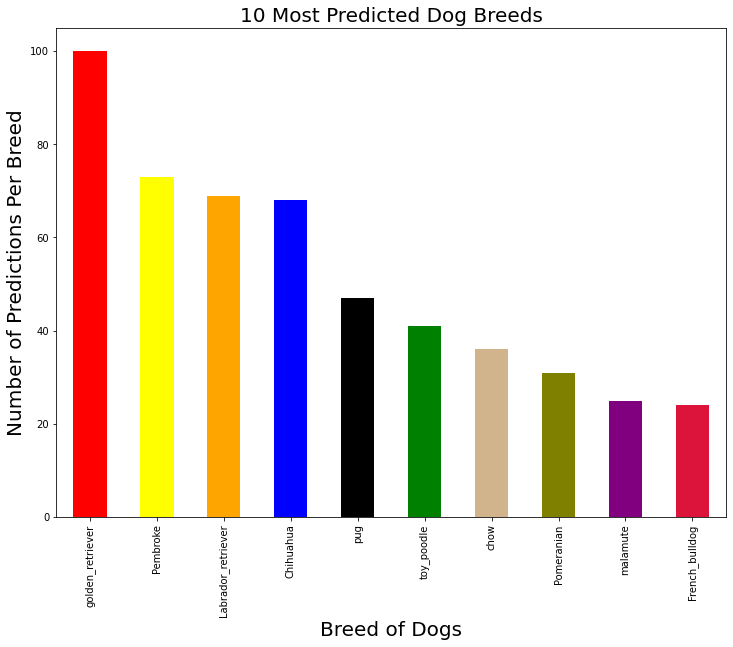

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
color = ['red', 'yellow', 'orange', 'blue', 'black', 'green', 'tan', 'olive', 'purple', 'crimson']
twitter_archive_master['predicted dog breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = color)
plt.title('10 Most Predicted Dog Breeds', size=20)
plt.xlabel('Breed of Dogs', size=20)
plt.ylabel('Number of Predictions Per Breed', size=20)

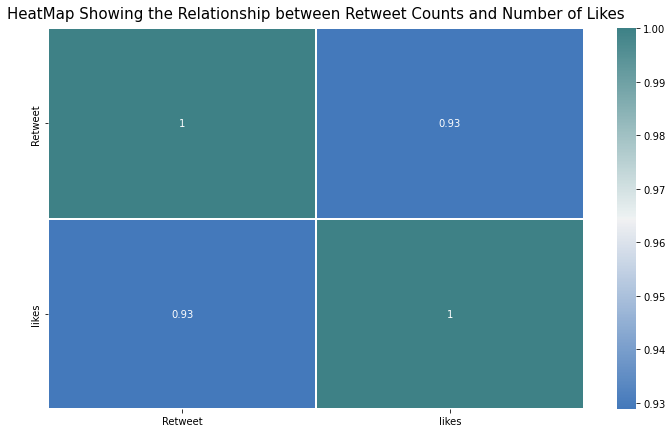

In [75]:
import seaborn as sns
cmap = sns.diverging_palette(250, 200, as_cmap=True)
plt.figure(figsize=(12,7))
labels = ['Retweet','likes']
sns.heatmap(correlation, xticklabels=labels, yticklabels=labels, annot=True, linewidths=.4, cmap= cmap)
plt.title('HeatMap Showing the Relationship between Retweet Counts and Number of Likes', fontsize=15, pad=10);

In [76]:
def boxplot(y, x, title, xlabel, ylabel, b):
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 25)
    sns.boxplot(y=y, x=x, data=twitter_archive_master, width=0.4, palette='hls')
    plt.title(title, size=30)
    plt.suptitle("")
    plt.xlabel(xlabel, size=30)
    plt.ylabel(ylabel, size=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.ylim(0,b)

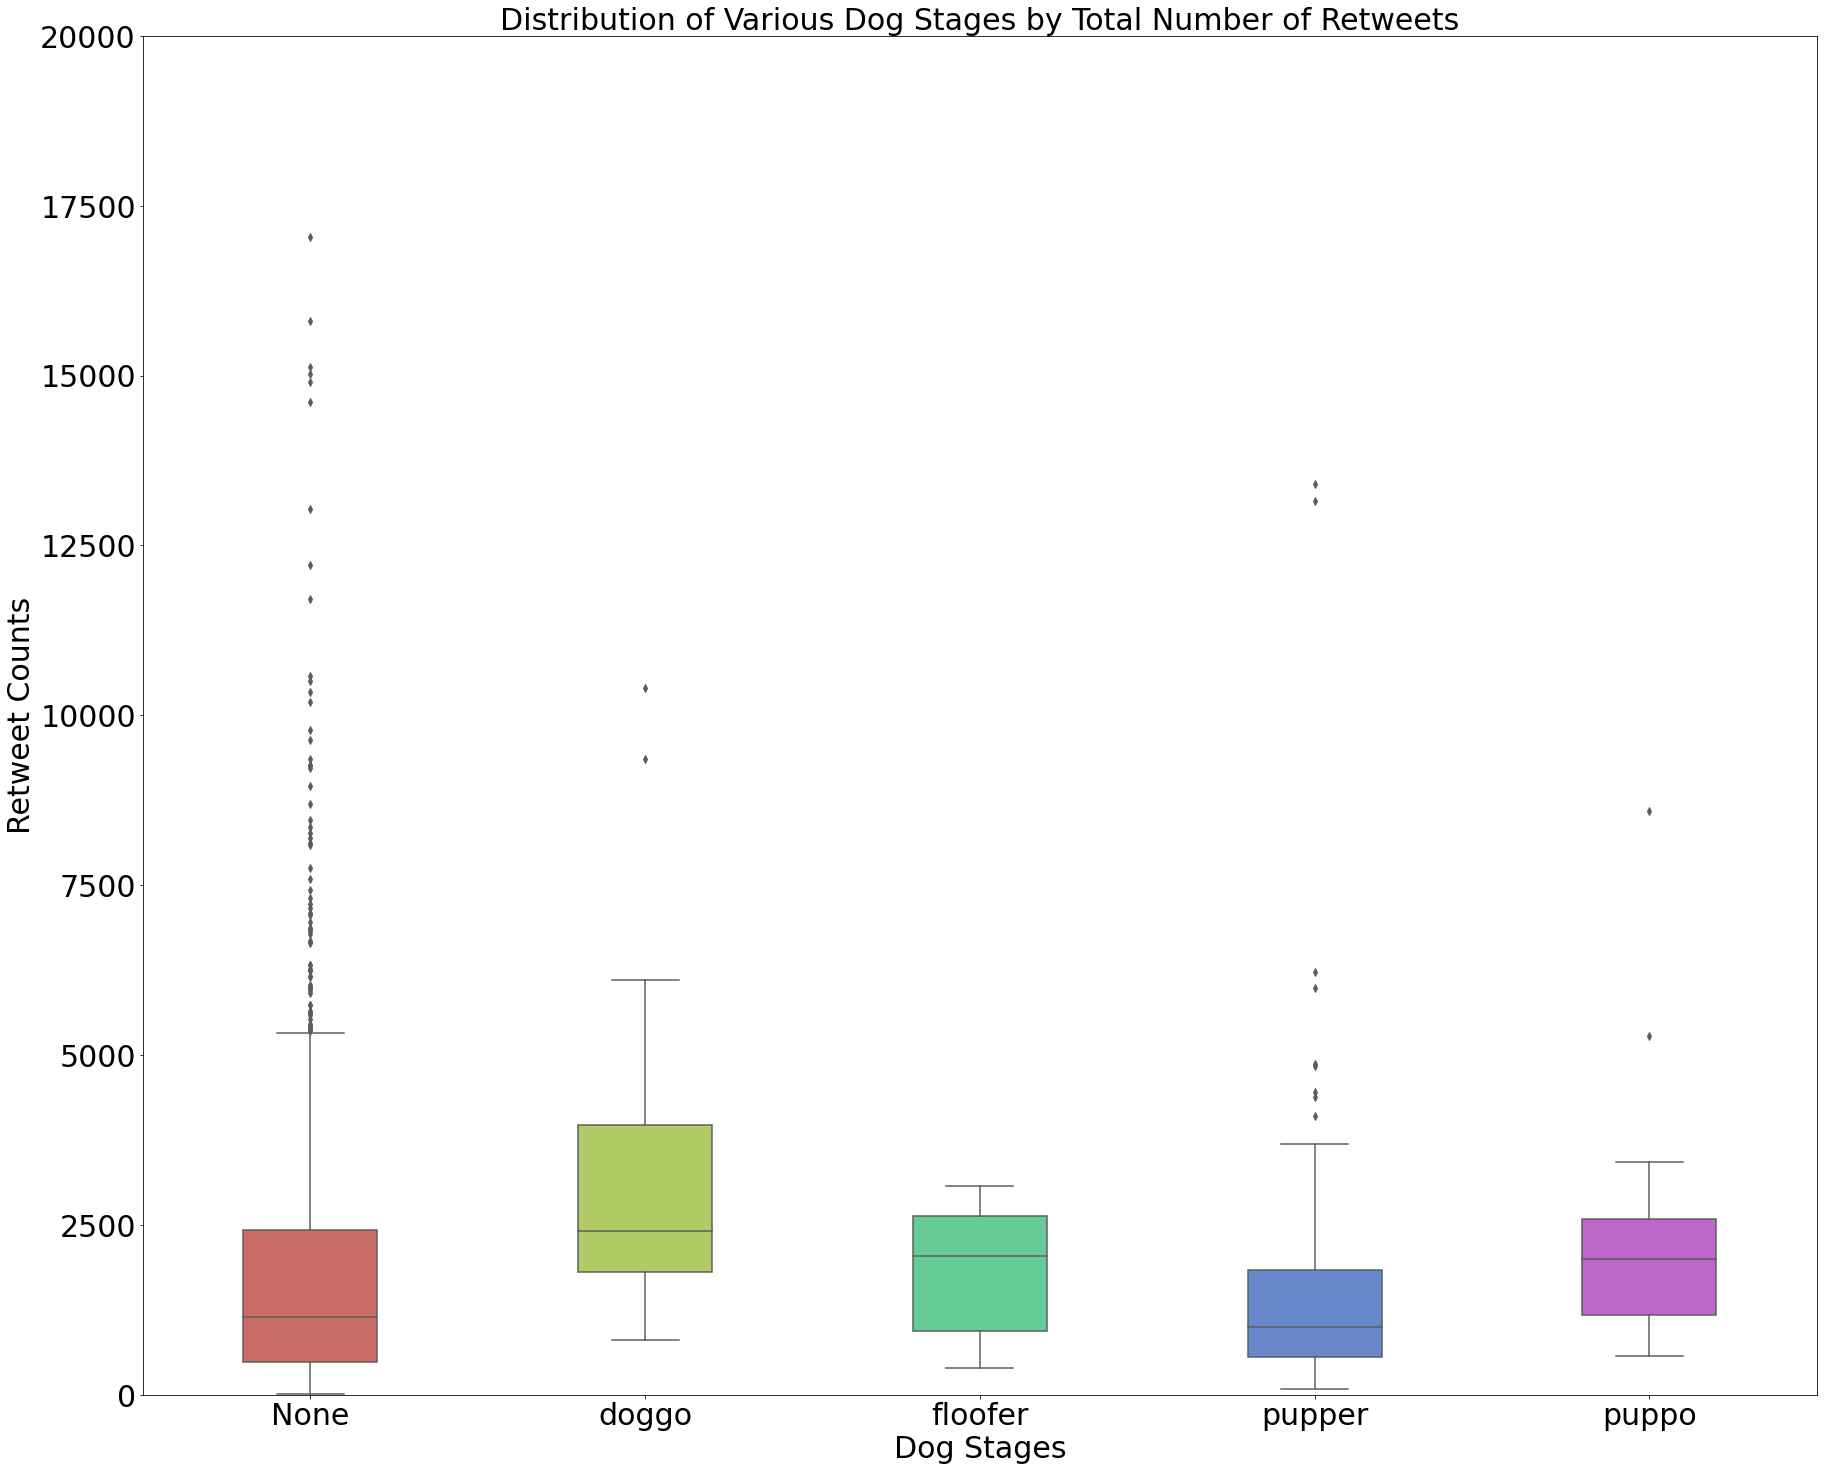

In [77]:
boxplot('number of retweets', 'dog_stages', 'Distribution of Various Dog Stages by Total Number of Retweets', 'Dog Stages', 'Retweet Counts', 20000)

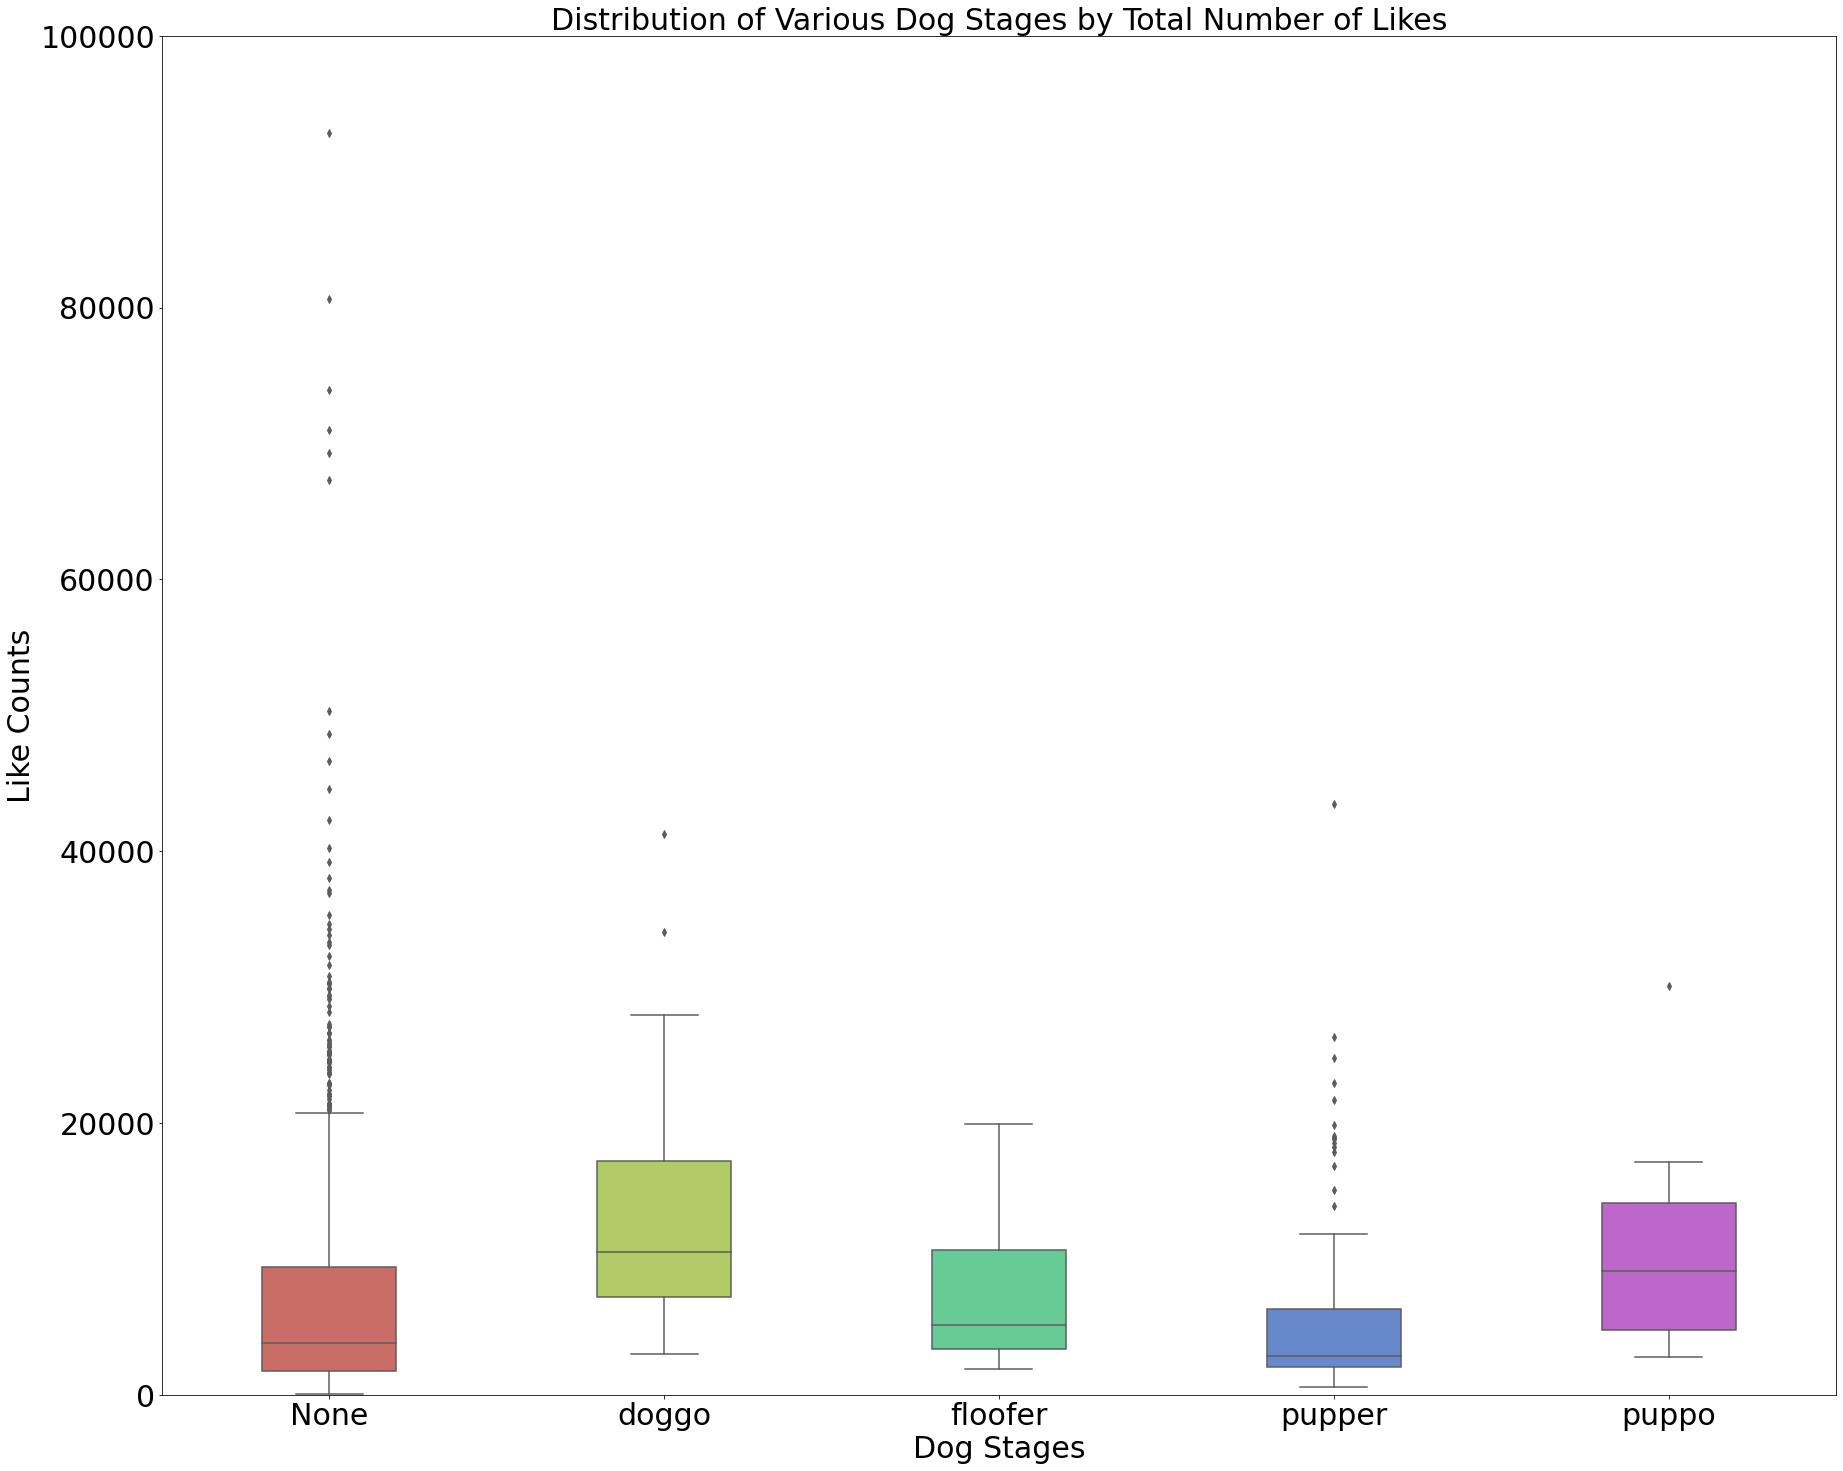

In [78]:
boxplot('number of likes', 'dog_stages', 'Distribution of Various Dog Stages by Total Number of Likes', 'Dog Stages', 'Like Counts', 100000)